# Control de Poblaciones de Insectos al Introducir Insectos Estériles

$$
N_{t+1}=\frac{R N_t^2}{(R-1)\frac{N_t^2}{M}+N_t+S}
$$

En 1937, E. F. Knipling, propuso la Técnica de Insectos Estériles (SIT, en inglés). La técnica no fue implementada haste 1958 sobre una plaga de  `screwworm` en EEUU usando métodos físicos y químicos para causar esterilidad. El método ha sido implementado en México o otros países de Sudamérica con éxito.

<img src="knipling.png" width="200">
<img src="worm.png" width="200">

Hasta años recientes SIT sigue siendo una técnica usada y estudiada en genética de poblaciones

* `Oliva, C., Damiens, D., Vreysen, M., Lempeiere, G., & Gilles, J. (2013). Reproductive strategies of aedes albopictus (diptera: Culicidae) and implications for the sterile insect technique. Plos One, 8(11), e78884. doi:10.1371/journal.pone.0078884`


* `Barnes, B. N., Hofmeyr, J. H., Groenewald, S., Conlong, D. E., & Wohlfarter, M. (2015). The sterile insect technique in agricultural crops in south africa: A metamorphosis …. but will it fly? African Entomology, 23(1), 1-18. doi:10.4001/003.023.0103`



In [1]:
using Plots, LaTeXStrings

pyplot()

Plots.PyPlotBackend()

In [2]:
f(x,α,β,γ) = (α*(x)^2)/((((α-1.0)*(x^2))/β + γ + x))

f (generic function with 1 method)

In [3]:
``` Este código nos permite iterar una función f n veces dada una condición inicial x0. 
``` 

function iteramapeo(f, x0, n)
    xx = [x0]
    fx = [0.0]
    for it = 1:n
        x1 = f(x0)
        push!(xx, x0)
        push!(fx, x1)
        x0 = x1
        push!(xx,x1)
        push!(fx,x1)
    end
    xx, fx
end

iteramapeo (generic function with 1 method)

In [4]:
``` Aquí definimos el valor de los parámetros que utilizamos con la convención \alpha \equiv R, \beta \equiv M,
``` \gamma \equiv S ```
α=500.0
β=10.0
γ=2.0
func = x -> f(x,α,β,γ)

(::#1) (generic function with 1 method)

In [5]:
using Interact 

In [6]:
xfin,ffin = iteramapeo(func,200.0,10);

Interact.Slider{Float64}(Signal{Float64}(100.0, nactions=0),"γ",100.0,0.0:1.0:200.0,".3f",true)


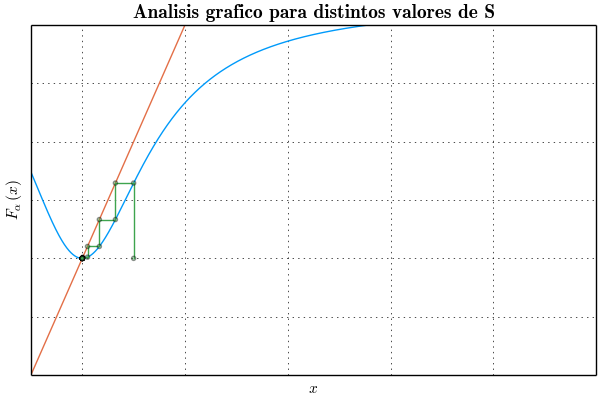

In [26]:
α = 10.0
β= 20.0
``` Este codigo genera 200 gráficas para distintos valores de \gamma y luego hace un .gif almacenado temporalmente
```
@manipulate for γ in 0:1.0:200
    pobla(x)=f(x,α,β,γ)
    xfin,ffin = iteramapeo(pobla,10.0,16); #Añade la condición inicial con la que se analiza el mapeo y 
    #su trayectoria, la función  definida un renglón arriba y el número de iteraciones.
    plot(-10:1/32:100, pobla, xaxis=(L"x", (-10.0, 100.0)), yaxis=(L"F_\alpha(x)",(-10.0,20.0)) # Hace la gráfica
    #con especificaciones para ejees.
    title!("Analisis grafico para distintos valores de S")
    plot!(-10:1/32:50, identity) #Grafica la identidad del análisis gráfico
    plot!(xfin, ffin, marker=(:dot, 3, 0.4)) #Señala dónde terminó la condición inicial dada
end

Aquí mostrasmos una gráfica del comportamiento temporal del mapeo cuando $S_{c}=0$ y se varía la condición inicial.

In [8]:
α = 10.0
β= 25.0
g(x,α,β)=(α*(x)^2)/((((α-1.0)*(x^2))/β + x)) #Define el mapeo con \gamma = 0

/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1236: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=8.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)


g (generic function with 1 method)

Interact.Slider{Float64}(Signal{Float64}(50.0, nactions=0),"i",50.0,0.0:1.0:100.0,".3f",true)


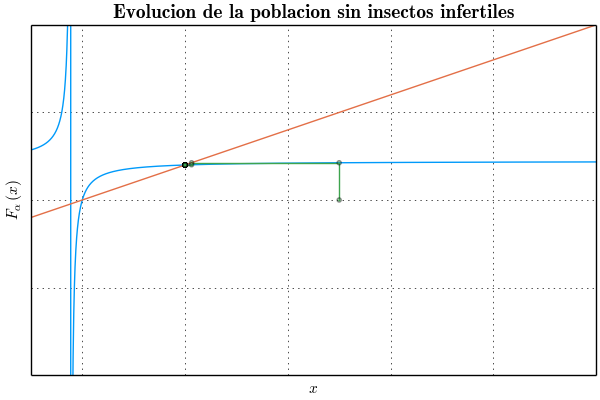

In [27]:
@manipulate for i in 0:1.0:100 #Este código realiza una gráfica interactiva que cambia la condición inicial
    # en cada paso entre 0 y 100 con los valores de \alpha y \beta dados anteriormente.
    poblaciones(i) = g(i,α,β)
    xfin,ffin = iteramapeo(poblaciones,i,20);
    plot(-10:1/32:100, poblaciones, xaxis=(L"x", (-10.0,100.0)), yaxis=(L"F_\alpha(x)",(-100.0,100.0)))
    title!("Evolucion de la poblacion sin insectos infertiles")
    plot!(-30:1/32:100, identity)
    plot!(xfin, ffin, marker=(:dot, 3, 0.4))
end

Vemos que en éste caso, la población total nunca muere, tal como se esperaba, pues no hay insectos infértiles en este caso.

Se resolvió la ecuación $N(x)-x=0$ para encontrar los puntos fijos del mapeo en términos de los parámetros R,S y M, obteniendo:

$X_{0}= 0$


y    



$X_{12}= \frac{\pm M(1-R)+\sqrt{R-1}\sqrt{M^{2}(1-R)-4MS}}{2(1-R)}$



Por lo que, para encontrar poblaciones estáticas distintas de cero, tenemos que se deben cumplir las siguientes condiciones:

$R> 1 $ ^ $M > \frac{4S}{R-1}$


In [10]:
Pkg.add("Roots")

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of Roots
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [11]:
using Roots

In [12]:
function puntofijo(F::Function, range) #Este código calcula los puntos fijos de una función F en un rango range.
    pf= fzeros(x -> (F(x) - x) , range)
    return pf
end 

puntofijo (generic function with 1 method)

In [13]:
α= 10.0
β= 25.0
γ= 50.0

F(x) = (α*(x)^2)/((((α-1.0)*(x^2))/β + γ + x)) #Se define la función con nuevos parámetros arbitrarios, pero que
#cumplen las condiciones mencionadas.


F (generic function with 1 method)

In [14]:
pf=puntofijo(F,[0,20.0]) #Se calculan los puntos fijos de éste mapeo.

3-element Array{Float64,1}:
  0.0    
  8.33333
 16.6667 

In [15]:
g(x)= (α*(x)^2)/((((α-1.0)*(x^2))/β + γ + x)) -x  #Se define el mapeo que nos permite estudiar la localización 
#de los puntos fijos al variar los parámetros.

g (generic function with 2 methods)

In [16]:
α= 10.0
β= 25.0
γ= 50.0
func=x -> g(x) #Se dan valores a los parámetros para realizar un ejemplo de sus puntos fijos.

(::#24) (generic function with 1 method)

A continuación se muestra una gráfica de los puntos fijos del mapeo en términos de los parámetros
$R=10$,$M=25$ y $S=50$.


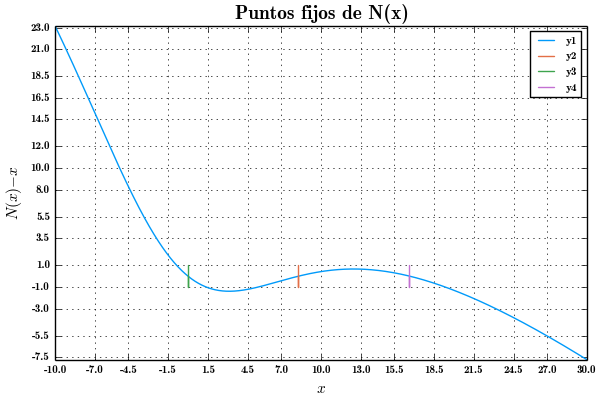

In [17]:
plot(-10:1/32:30, func,xticks=-10:0.5:100,yticks=-10:0.5:50) #Se grafica el mapeo N(X)-x
xlabel!(L"x")
ylabel!(L"N(x)-x")
title!("Puntos fijos de N(x)")
plot!([8.3,8.3], [1, -1, 0]) #Se marcan los puntos fijos sobre la gráfica.
plot!([0,0], [1, -1,0])
plot!([16.66,  16.66], [1, -1, 0])

A continuación se muestran graficas que relacionan los parámetros y el comportamiento de los puntos fijos dependiendo de éstos.

La función a estudiar es:

$N(X)-X= \frac{MRX^{2}}{(R-1)X^{2}+M(X+S)} -X $

 Nos interesa encontrar éste mapeo pues nos permite observar el comportamiento de los puntos fijos en función de los parámetros.

En primer lugar, estudiemos a los puntos fijos para distintas $M$ en cada gráfica en función de $R$ y $S$ para una condición inicial fija $X_{0}=10.0$. 

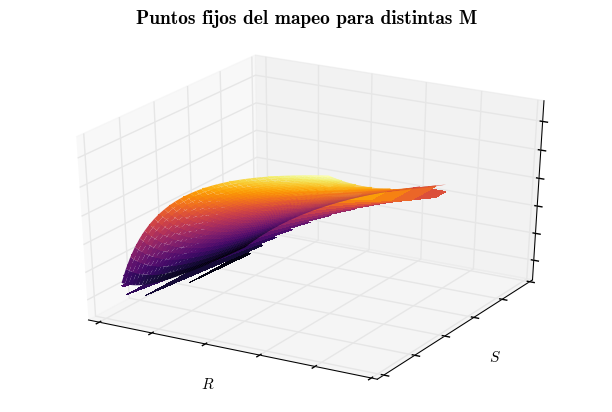

INFO: Saved animation to /home/juser/tmp.gif


Plots.AnimatedGif("/home/juser/tmp.gif")

In [21]:
pyplot(leg=false, ticks=nothing) #Este código realiza una gráfica para cada valor de M entre 1 y 80
x = y = linspace(2.0, 40, 40) #Establece el paso entre cada x,y y sus valores máximo y mínimo.
zs = zeros(0,40)
x0= 10.0 #Condición inicial arbitraria
@gif for i in linspace(1, 80, 100) #Creando el .gif, con 100 imágenes.
    G(x,y) = (x*(x0)^2)/((((x-1.0)*(x0^2))/i + y + x0))-x0


plot(x, y, G, st = [:surface, :contourf],xaxis=(L"R",(-1.0, 50)),yaxis=(L"S",(-1.0, 50)),title="Puntos fijos del mapeo para distintas M")
        
   end

Ahora estudiamos el comportamiento de los puntos fijos con un valor distinto de $R$ en cada gráfica que varía en función de $M$ y $S$.

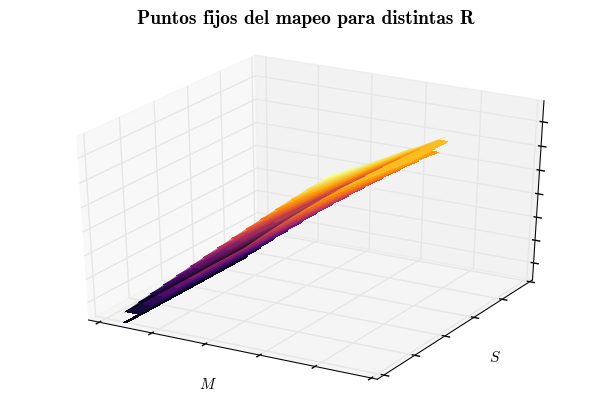

INFO: Saved animation to /home/juser/tmp.gif


Plots.AnimatedGif("/home/juser/tmp.gif")

In [22]:
pyplot(leg=false, ticks=nothing) #Este código realiza una gráfica para cada valor de R entre 1 y 100.
x = y = linspace(2.0, 40, 40)
zs = zeros(0,40)
x0= 10.0
@gif for i in linspace(1,100,100) #Se genera el .gif con 100 imágenes. 
    G(x,y) = (i*(x0)^2)/((((i-1.0)*(x0^2))/x + y + x0))-x0
    title!(L"Puntos fijos del mapeo")
    p = plot(x, y, G, st = [:surface, :contourf],xaxis=(L"M",(-1.0, 50)),yaxis=(L"S",(-1.0, 50)),title="Puntos fijos del mapeo para distintas R")
        
 end

Finalmente, observemos la evolución de los puntos fijos para un valor distinto de $S$ en cada gráfica que se encuentra en
función de $M$ y $R$.

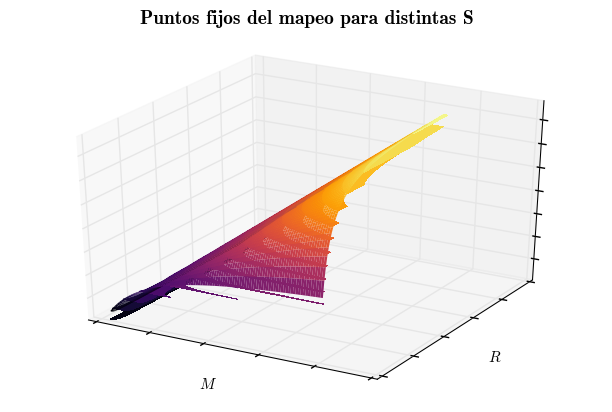

INFO: Saved animation to /home/juser/tmp.gif


Plots.AnimatedGif("/home/juser/tmp.gif")

In [33]:
pyplot(leg=false, ticks=nothing) #Este código genera una gŕafica para cada valor de S en función de M y R.
x = y = linspace(2.0, 80, 90)
zs = zeros(0,90)
x0= 50.0 #Se utiliza otra condición inicial.
@gif for i in linspace(1, 100, 100) #Se construye el .gif con 100 imágenes también.
    G(x,y) = (y*(x0)^2)/((((y-1.0)*(x0^2))/x + i + x0))-x0
    title!(L"Puntos fijos del mapeo")
    p = plot(x, y, G, st = [:surface, :contourf],xaxis=(L"M",(-1.0,100)),yaxis=(L"R",(-1.0, 100)),title="Puntos fijos del mapeo para distintas S")
        
end